# How can we build a machine learning model in Python that accurately predicts a song's popularity—using features like audio characteristics (e.g. energy, loudness, danceability), metadata (e.g. genre, artist), and historical performance—to classify or score its potential success?

In [1]:
!pip install xgboost

In [37]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

In [5]:
# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\tajud\OneDrive\Desktop\NRIT\sudents and projects\S2\Reression\Spotify_data.csv")

In [19]:
df.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,104,93,107,150,172,96,163,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,59,65,66,179,65,94,173,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,16,44,21,124,203,91,170,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,63,53,69,24,82,90,158,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,113,87,115,165,114,89,157,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [7]:
# Step 3: Drop Irrelevant or High-Cardinality Columns
df = df.drop(columns=['track_id', 'track_name', 'album_name', 'artist_id'], errors='ignore')

In [9]:
# Step 4: Handle Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [11]:
# Step 5: Handle Missing Values
df = df.dropna()  # Or use df.fillna(df.mean())

In [23]:
# Step 6: Feature Scaling
X = df.drop('Popularity', axis=1)
y = df['Popularity']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [39]:
# Step 8: Define and Train Regressors
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
     "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
    
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R²': r2}
    print(f"{name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R² Score: {r2:.4f}\n")

Linear Regression:
  RMSE: 6.95
  R² Score: 0.2742

Ridge Regression:
  RMSE: 6.94
  R² Score: 0.2767

Random Forest:
  RMSE: 5.59
  R² Score: 0.5298

XGBoost:
  RMSE: 4.84
  R² Score: 0.6486



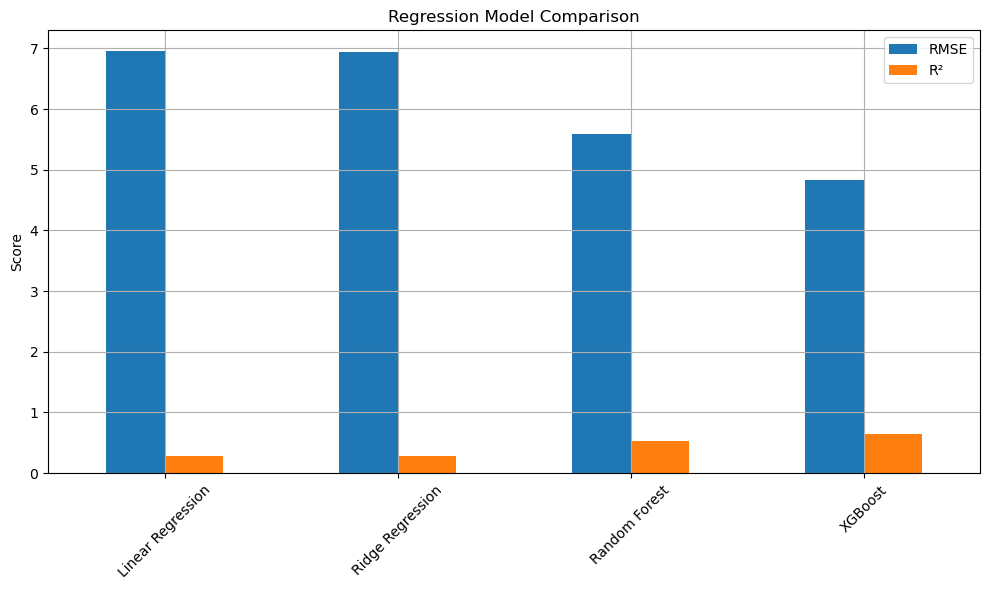

In [41]:
# Step 9: Plot Comparison
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(10,6), title='Regression Model Comparison')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()